<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [108]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

In [5]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


Данные в норме, пропущенных значений нет, типы данных изменены

<AxesSubplot:>

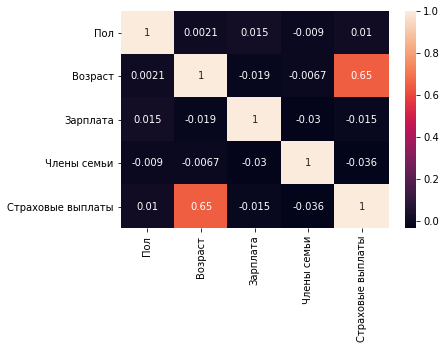

In [111]:
sns.heatmap(df.corr(), annot=True)

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** Посмотрим на примере уравнения, признаки умножим на обратимую мартицу
$$
a = XPw
$$
Добавим к формуле обучения:
$$
a = XP((XP)^TXP)^{-1}(XP)^Ty))
$$
Раскроем скобки с транспонированием матриц:
$$
a = XP(P^TX^TXP)^{-1}P^TX^Ty
$$

Вспомним одно из свойств матриц: $A(BC) = (AB)C$ Оно позволяет группировать матрицы внутри произведения различным образом. Т.к. обратная матрица может браться только от квадратной матрицы, то для раскрытия скобок данного произведения нам надо сгруппировать его множители так, чтобы они были квадратными матрицами. Учитывая это правило расскроем скобки:

$$
a = XPP^{-1}(P^TX^TX)^{-1}P^TX^Ty
$$

$$
a = XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

Насколько нам известно произведения $PP^{-1}$ и $(P^T)^{-1}P^T$ дают нам единичные матрицы, поэтому их можно исключить
$$
a = X(X^T X)^{-1} X^T y
$$
Вспомним, что $w = (X^T X)^{-1} X^T y$ значит:
$$
a = Xw
$$

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования примем домножение обучающих признаков X на случайную обратимую матрицу P размером 4х4. Создадим модель линейной регрессии до преобразования и посчитаем метрику R2. Далее умножим исходные признаки на обратимую матрицу и на основе полученных значений вновь посчитаем метрику R2. Метрики R2 по итогу должны быть равны.

**Обоснование**

Как было показано в предыдущем пункте, домножение признаков на какую-либо обратимую матрицу не приводит к изменению предсказаний, поэтому результаты R2 должны оказаться равны.

## Проверка алгоритма

Для проверки алогоритма подготовим признаки 

In [6]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Обучим линейную регрессию и определим метрику r2

In [7]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print(f'Метрика R2 {r2}')

Метрика R2 0.42494550308169177


Создадим обратимую матрицу и умножим на нашу матрицу

In [105]:
m = np.random.normal(size=(4, 4))
features_m = features @ np.linalg.inv(m)
features_m.head()

,0,1,2,3
0,-7987.465464,10861.501002,23018.391736,-31164.738021
1,-6149.446313,8310.370126,17653.928081,-23892.130513
2,-3406.098382,4589.974208,9761.749540,-13207.706312
3,-6689.479707,9140.992019,19333.886842,-26187.151428
4,-4215.171168,5710.949604,12121.069512,-16405.678713


Для того чтобы матрица была обратимая, необходимо выполнение одного условия: определитель матрицы не должен быть равен 0

In [106]:
np.linalg.det(m)

1.3586263742759284

Условие выполнено, значит матрица обратимая

Проверим метрику r2

In [107]:
model_2 = LinearRegression()
model_2.fit(features_m, target)
predictions = model_2.predict(features_m)
r2_m = r2_score(target, predictions)
print(f'Метрика R2 {r2_m}')

Метрика R2 0.424945503081685


Метрики одинаковые

Вывод: метод умножения исходных данных на случайную обратимую матрицу может быть применено для защиты данных клиентов

## Вывод

Перед нами стояла задача разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, с условием, что при преобразовании качество моделей машинного обучения не ухудшится.

Для этого мы разработали алгоритм преобразования данных, проверив на матричных уравнениях, что при умножении признаков на обратимую матрицу качество линейной регрессии не изменится.

Затем проверили на полученных данных: расситали метрику r2 без умножения на обратимую матрицу и после умножения. Метрики оказались равны.

Таким образом, мы пришли к выводу, что метод умножения исходных данных на случайную обратимую матрицу может быть применено для защиты данных клиентов